In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("Salary_dataset.csv")
data.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [3]:
data.shape

(30, 3)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


In [5]:
data.isnull().sum()

Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64

In [6]:
data=data.drop('Unnamed: 0',axis=1)
data.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [7]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


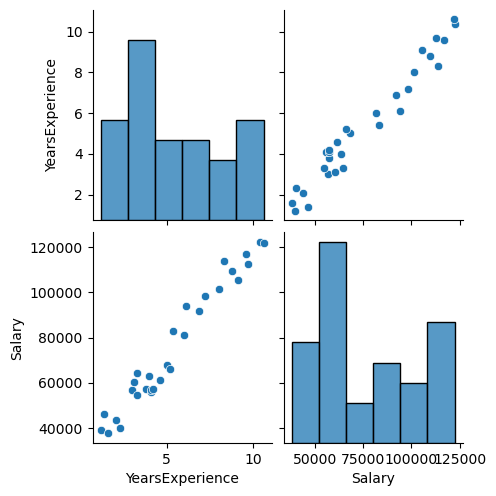

In [8]:
sns.pairplot(data)
plt.show()

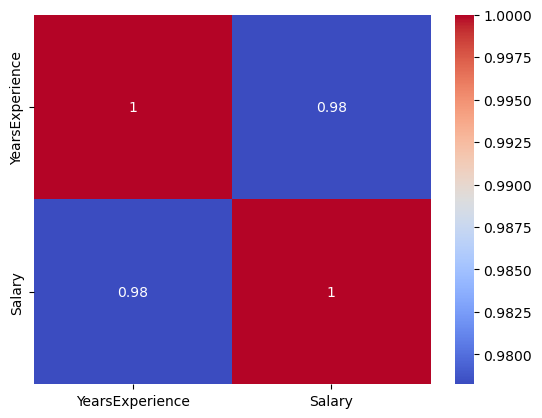

In [9]:
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')
plt.show()

In [10]:
# lets build a Simple linear regression model


In [11]:
X=data['YearsExperience']
y=data['Salary']

In [12]:
# spliting the data set into traning and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=50)

In [13]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((24,), (24,), (6,), (6,))

In [14]:
import statsmodels.api as sm
X_train_sm=sm.add_constant(X_train)
slr=sm.OLS(y_train,X_train_sm).fit()

In [15]:
print(slr.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     610.2
Date:                Fri, 13 Dec 2024   Prob (F-statistic):           1.55e-17
Time:                        11:51:13   Log-Likelihood:                -239.42
No. Observations:                  24   AIC:                             482.8
Df Residuals:                      22   BIC:                             485.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.376e+04   2319.290     

Text(0.5, 1.0, 'traning data')

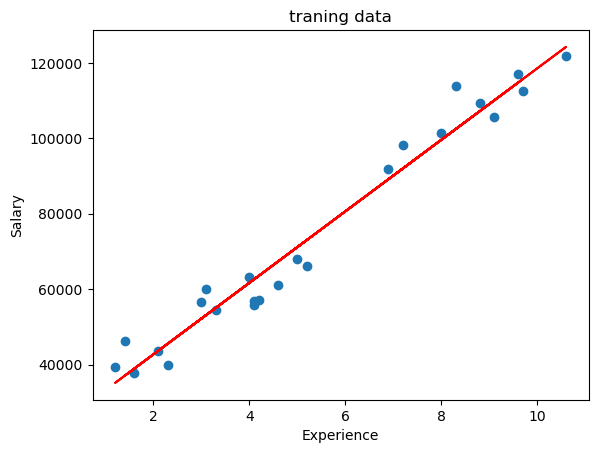

In [16]:
plt.scatter(X_train,y_train)
plt.plot(X_train,2.376e+04+9478.2056*X_train,'r')
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.title("traning data")

In [17]:
pred_train=slr.predict(X_train_sm)

In [18]:
pred_train

25    110008.946157
20     89156.893881
29    124226.254527
21     92000.355555
10     61670.097700
27    115695.869505
12     62617.918258
3      43661.507098
14     67357.021048
24    107165.484483
15     71148.303280
7      55035.353794
2      38922.404308
22     99582.920019
26    114748.048947
23    102426.381693
5      52191.892120
6      53139.712678
4      45557.148214
1      37026.763192
13     63565.738816
11     62617.918258
0      35131.122076
16     73043.944396
dtype: float64

In [19]:
dd=pd.DataFrame(y_train)
dd1=pd.DataFrame(pred_train)
dd=pd.concat([dd,dd1],axis=1)
dd=dd.rename(columns={'Salary':'Actual Salary',0:'Predicted Salary'})
dd.head()

,Actual Salary,Predicted Salary
25,105583.0,110008.946157
20,91739.0,89156.893881
29,121873.0,124226.254527
21,98274.0,92000.355555
10,63219.0,61670.097700


In [20]:
X_test_sm=sm.add_constant(X_test)
y_pred_test=slr.predict(X_test_sm)

In [21]:
y_test

17     83089.0
8      64446.0
28    122392.0
9      57190.0
18     81364.0
19     93941.0
Name: Salary, dtype: float64

In [22]:
dd=pd.DataFrame(y_test)
dd1=pd.DataFrame(y_test)
dd=pd.concat([dd,dd1],axis=1)
dd=dd.rename(columns={'Salary':'Actual Salary',0:'Predicted Salary'})
dd.head()

,Actual Salary,Actual Salary
17,83089.0,83089.0
8,64446.0,64446.0
28,122392.0,122392.0
9,57190.0,57190.0
18,81364.0,81364.0


Text(0.5, 1.0, 'testing  data')

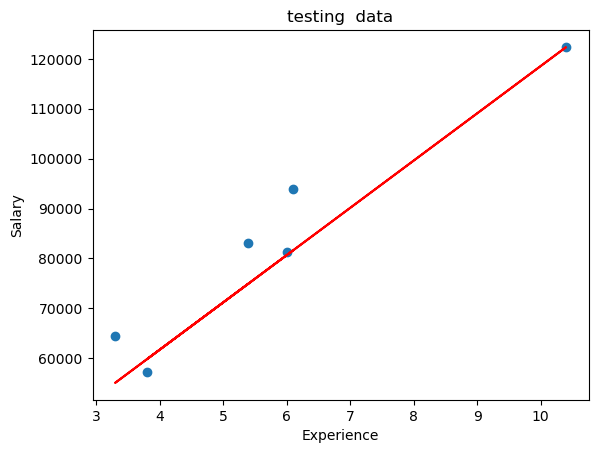

In [23]:
plt.scatter(X_test,y_test)
plt.plot(X_test,2.376e+04+9478.2056*X_test,'r')
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.title("testing  data")

In [24]:
from sklearn.metrics import r2_score

In [25]:
r2=r2_score(y_test,y_pred_test)
r2

0.8824679635169835

In [26]:
# priding a salary of an employee with 12 years of experience
#slr.predict([[12.5]])

# DATA TWO

In [28]:
data1=pd.read_csv("student_scores.csv")
data1.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [29]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


In [30]:
data1.shape

(25, 2)

In [31]:
data1.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


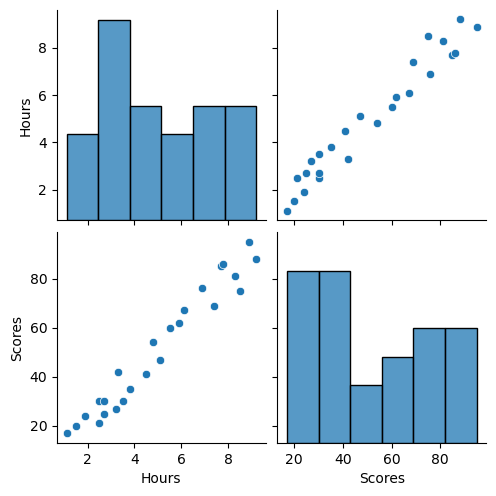

In [32]:
sns.pairplot(data1)
plt.show()

In [33]:
# lets build a Simple linear regression model


In [34]:
X_1=data1['Hours']
y_1=data1['Scores']

In [35]:
from sklearn.model_selection import train_test_split
X_train_1,X_test_1,y_train_1,y_test_1=train_test_split(X_1,y_1,test_size=0.2,random_state=40)

In [36]:
import statsmodels.api as sm
X_train_1_sm=sm.add_constant(X_train_1)
Slr=sm.OLS(y_train_1,X_train_1_sm).fit()

In [37]:
print(Slr.summary())

                            OLS Regression Results                            
Dep. Variable:                 Scores   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     345.6
Date:                Fri, 13 Dec 2024   Prob (F-statistic):           3.39e-13
Time:                        11:51:14   Log-Likelihood:                -60.996
No. Observations:                  20   AIC:                             126.0
Df Residuals:                      18   BIC:                             128.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7557      2.807      0.625      0.5

In [38]:
y_pred=Slr.predict(X_train_1_sm)

In [39]:
y_pred

3     84.550413
21    48.510378
2     32.925498
11    59.224983
17    20.262783
4     35.847663
8     82.602303
16    26.107113
22    38.769828
20    28.055223
0     26.107113
9     28.055223
10    76.757973
23    68.965533
12    45.588213
1     51.432543
18    61.173093
5     16.366563
7     55.328763
6     91.368798
dtype: float64

In [40]:
dd=pd.DataFrame(y_train_1)
dd1=pd.DataFrame(y_pred)
dd=pd.concat([dd,dd1],axis=1)
dd=dd.rename(columns={'Salary':'Actual Score',0:'Predicted Score'})
dd.head()

,Scores,Predicted Score
3,75,84.550413
21,54,48.510378
2,27,32.925498
11,62,59.224983
17,24,20.262783


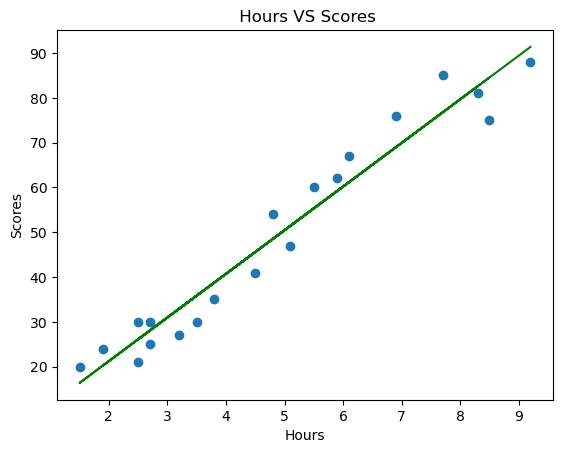

In [41]:
plt.scatter(X_train_1,y_train_1)
plt.plot(X_train_1,1.7557+9.7405*X_train_1,'g')
plt.title(" Hours VS Scores")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

In [42]:
X_test_1_sm=sm.add_constant(X_test_1)
y_test_1_pred=Slr.predict(X_test_1_sm)

In [43]:
y_test_1

15    95
24    86
14    17
19    69
13    42
Name: Scores, dtype: int64

In [44]:
y_test_1_pred

15    88.446633
24    77.732028
14    12.470343
19    73.835808
13    33.899553
dtype: float64

In [45]:
dd=pd.DataFrame(y_test_1)
dd1=pd.DataFrame(y_test_1_pred)
dd=pd.concat([dd,dd1],axis=1)
dd=dd.rename(columns={'Salary':'Actual Score',0:'Predicted Score'})
dd.head()

,Scores,Predicted Score
15,95,88.446633
24,86,77.732028
14,17,12.470343
19,69,73.835808
13,42,33.899553


In [46]:
from sklearn.metrics import r2_score

In [47]:
r2=r2_score(y_test_1,y_test_1_pred)

In [48]:
r2

0.9466449081971942